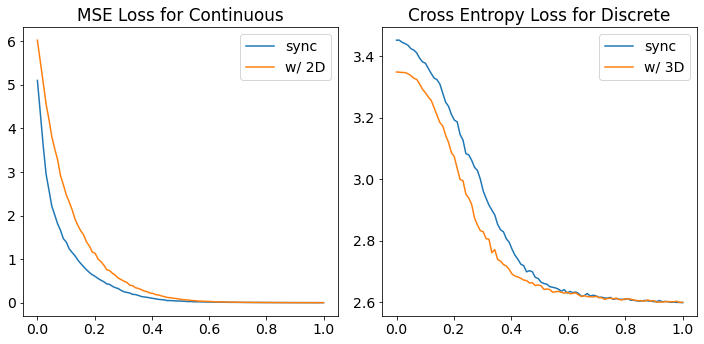

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14, 'text.usetex': True})

loss_partial_modal = torch.load('../loss_latest.pt')
N = len(loss_partial_modal['sync']['pos_mse'])

# plot the loss w.r.t. t
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
t = np.linspace(0, 1, N)
for i, key in enumerate(['sync', 'w/ 2D', 'w/o 2D', 'w/ 3D', 'w/o 3D']):
    if 'w/o' in key:
        continue

    if '3D' not in key:
        ax[0].plot(t, loss_partial_modal[key]['pos_mse'], label=key)
    if '2D' not in key:
        loss_2d = [loss_type + loss_bond for loss_type, loss_bond in zip(loss_partial_modal[key]['type_ce'], loss_partial_modal[key]['bond_ce'])]
        ax[1].plot(t, loss_2d, label=key)
    

ax[0].set_title('MSE Loss for Continuous (3D)')
ax[1].set_title('Cross Entropy Loss for Discrete (2D)')
# ax[1].set_xlabel('t', loc='right')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('loss_partial_modal_couple.pdf', dpi=300)

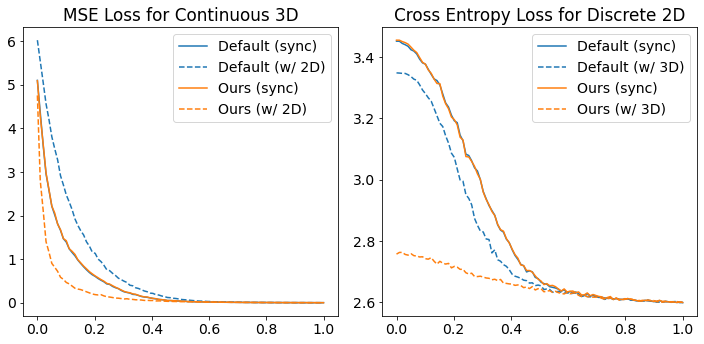

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

loss_partial_modal = torch.load('../loss_coupled.pt')
N = len(loss_partial_modal['sync']['pos_mse'])

# plot the loss w.r.t. t
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, key in enumerate(['sync', 'w/ 2D', 'w/o 2D', 'w/ 3D', 'w/o 3D']):
    if 'w/o' in key:
        continue
    if key == 'sync':
        linestyle = '-'
    else:
        linestyle = '--'

    if '3D' not in key:
        ax[0].plot(t, loss_partial_modal[key]['pos_mse'], label=f'Default ({key})', linestyle=linestyle, color='tab:blue')
    if '2D' not in key:
        loss_2d = [loss_type + loss_bond for loss_type, loss_bond in zip(loss_partial_modal[key]['type_ce'], loss_partial_modal[key]['bond_ce'])]
        ax[1].plot(t, loss_2d, label=f'Default ({key})', linestyle=linestyle, color='tab:blue')

loss_partial_modal = torch.load('../loss_latest.pt')
assert N == len(loss_partial_modal['sync']['pos_mse'])
# plot the loss w.r.t. t
for i, key in enumerate(['sync', 'w/ 2D', 'w/o 2D', 'w/ 3D', 'w/o 3D']):
    if 'w/o' in key:
        continue
    if key == 'sync':
        linestyle = '-'
    else:
        linestyle = '--'
    if '3D' not in key:
        ax[0].plot(t, loss_partial_modal[key]['pos_mse'], label=f'Ours ({key})', linestyle=linestyle, color='tab:orange')
    if '2D' not in key:
        loss_2d = [loss_type + loss_bond for loss_type, loss_bond in zip(loss_partial_modal[key]['type_ce'], loss_partial_modal[key]['bond_ce'])]
        ax[1].plot(t, loss_2d, label=f'Ours ({key})', linestyle=linestyle, color='tab:orange')
    

ax[0].set_title('MSE Loss for Continuous 3D')
ax[1].set_title('Cross Entropy Loss for Discrete 2D')
# ax[1].set_xlabel('t', loc='right')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig('loss_partial_modal.pdf', dpi=300)

/tmp/ipykernel_3495576/2916510950.py:25: RuntimeWarning: divide by zero encountered in divide
  snr = (1 - gamma) / gamma


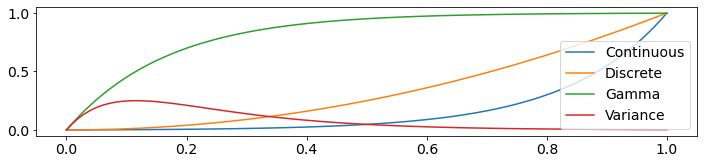

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

def get_continuous_schedule(t, sigma1_coord):
    return sigma1_coord ** (-2 * t) - 1

def get_discrete_schedule(t, beta1):
    return beta1 * (t ** 2)

N = 100

# plot the loss w.r.t. t
fig, ax = plt.subplots(1, 1, figsize=(10, 2.5))
t = np.linspace(0, 1, N)
sigma1_coord = 0.05
beta1 = 1.5

continuous_schedule = get_continuous_schedule(t, sigma1_coord)
discrete_schedule = get_discrete_schedule(t, beta1)
gamma = continuous_schedule / (1 + continuous_schedule)
variance = gamma * (1 - gamma)
snr = (1 - gamma) / gamma

# normalize
continuous_schedule = continuous_schedule / continuous_schedule.max()
discrete_schedule = discrete_schedule / discrete_schedule.max()
# gamma = gamma / gamma.max()
# variance = variance / np.abs(variance).max()
# snr = snr / snr.max()

ax.plot(t, continuous_schedule, label='Continuous')
ax.plot(t, discrete_schedule, label='Discrete', color='tab:orange')
ax.plot(t, gamma, label='Gamma', color='tab:green')
ax.plot(t, variance, label='Variance', color='tab:red')
# ax.plot(t, snr, label='SNR', color='tab:purple')
# ax1 = ax.twinx()
# ax1.plot(t, discrete_schedule, label='Discrete', color='tab:orange')

plt.legend()
plt.tight_layout()
plt.savefig('noise_schedule.pdf', dpi=300)